In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

/Users/emtruzzi/miniconda3/envs/scient/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_excel('greycom_sales_noOut.xlsx')

In [4]:
df.head()

,DataEmissao,SKU,Qtd
0,2023-12-20,AWR1-110X74,72
1,2023-12-20,AWR1-110X74,72
2,2023-12-20,AWR1-110X74,72
3,2023-12-20,TC193,70
4,2023-12-20,AWR1-110X74,48


In [6]:

#rename columns to something more understandable
df.rename(columns={'DataEmissao':'date', 'Qtd':'quant'}, inplace=True)

#convert date column to datetime type
df['date'] = pd.to_datetime(df.date)


In [7]:
df['day_of_week'] = df['date'].dt.day_name()

In [8]:
#show result
df.head()

,date,SKU,quant,day_of_week
0,2023-12-20,AWR1-110X74,72,Wednesday
1,2023-12-20,AWR1-110X74,72,Wednesday
2,2023-12-20,AWR1-110X74,72,Wednesday
3,2023-12-20,TC193,70,Wednesday
4,2023-12-20,AWR1-110X74,48,Wednesday


### Visualizing the time series

In [7]:
#set date as index
df.set_index('date', inplace=True)

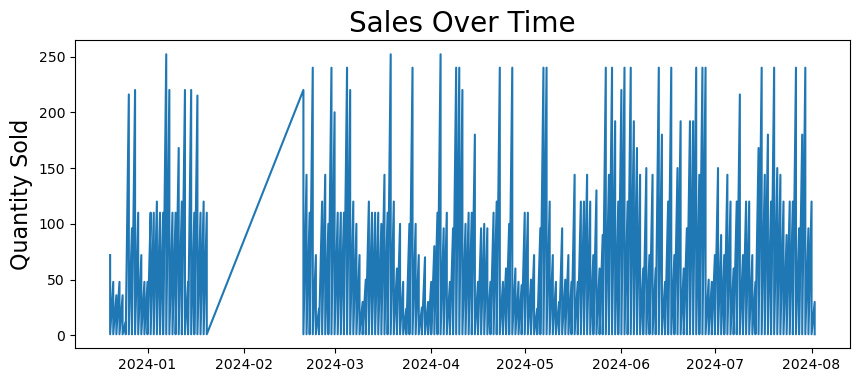

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df.quant)
plt.title('Sales Over Time', fontsize=20)
plt.ylabel('Quantity Sold', fontsize=16)
for month in range(2024,2024):
    plt.axvline(pd.to_datetime(str(month)+'-01-01'), color='k', linestyle='--', alpha=0.2)


### Visualizing average quantity sold per day

In [9]:
average_quant_per_day = df.groupby('day_of_week')['quant'].mean().reset_index()

# Display the result
print(average_quant_per_day)

  day_of_week     quant
0      Friday  4.266215
1      Monday  4.426265
2    Saturday  3.468034
3      Sunday  3.149514
4    Thursday  4.343105
5     Tuesday  4.546310
6   Wednesday  4.292638


Monday - 4.426265
Tuesday - 4.546310
Wednesday - 4.292638
Thursday - 4.393133
Friday - 4.315834
Saturday - 3.468034
Sunday - 3.149514




In [10]:
# Define the order for the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'day_of_week' to a categorical type with the specified order
average_quant_per_day['day_of_week'] = pd.Categorical(average_quant_per_day['day_of_week'], categories=day_order, ordered=True)

# Sort the DataFrame by the ordered 'day_of_week'
average_quant_per_day = average_quant_per_day.sort_values('day_of_week')

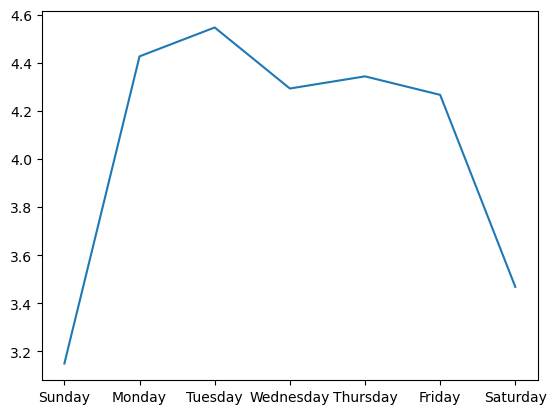

In [11]:
average_quant_per_day.set_index('day_of_week', inplace=True)
plt.plot(average_quant_per_day)

### Trying to collapse all products

In [12]:
df

,SKU,quant,day_of_week
date,,,
2023-12-20,AWR1-110X74,72,Wednesday
2023-12-20,AWR1-110X74,72,Wednesday
2023-12-20,AWR1-110X74,72,Wednesday
2023-12-20,TC193,70,Wednesday
2023-12-20,AWR1-110X74,48,Wednesday
...,...,...,...
2024-08-02,L42PROFULL,1,Friday
2024-08-02,MP4200,1,Friday
2024-08-02,TC270,1,Friday


In [13]:
df_collapsed = df.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'})

/var/folders/k8/hhz0yyvj6qj76b46zqvs9w0r0000gn/T/ipykernel_68487/2793550119.py:1: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  df_collapsed = df_grey.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'})


In [14]:
#Number of unique SKU values

unique_SKUs = df_collapsed['SKU'].nunique()
print(unique_SKUs)

150


In [15]:
df_collapsed.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

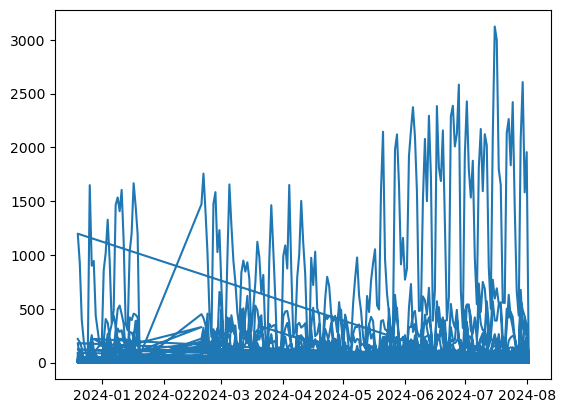

In [ ]:
plt.plot(df_collapsed.quant)

# Analyzing just SKU TC213


## Data Preparation 

In [9]:
df_tc = df[df['SKU'] == 'TC213']
df_tc

,date,SKU,quant,day_of_week
98,2023-12-20,TC213,4,Wednesday
105,2023-12-20,TC213,3,Wednesday
191,2023-12-20,TC213,1,Wednesday
209,2023-12-20,TC213,1,Wednesday
215,2023-12-20,TC213,1,Wednesday
...,...,...,...,...
125131,2024-08-02,TC213,1,Friday
125142,2024-08-02,TC213,1,Friday
125144,2024-08-02,TC213,1,Friday
125155,2024-08-02,TC213,1,Friday


In [10]:
df_c_tc = df_tc.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'})

In [11]:
df_c_tc.set_index('date', inplace=True)
df_c_tc.index = pd.to_datetime(df_c_tc.index)

In [12]:
df_c_tc

,SKU,quant
date,,
2023-12-20,TC213,20
2023-12-21,TC213,35
2023-12-22,TC213,50
2023-12-23,TC213,27
2023-12-24,TC213,10
...,...,...
2024-07-29,TC213,9
2024-07-30,TC213,52
2024-07-31,TC213,172


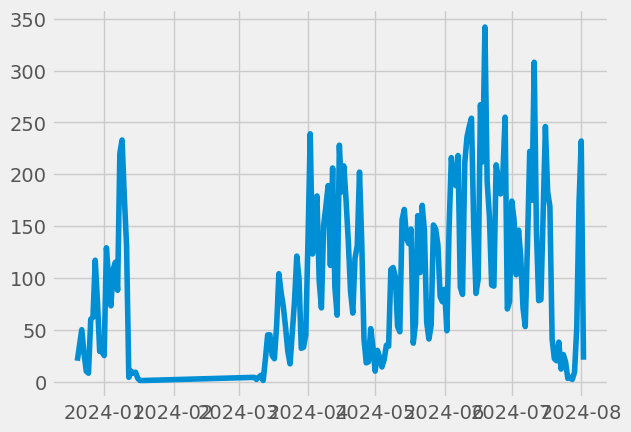

In [13]:
#Whole time period obbservations

plt.plot(df_c_tc.quant)

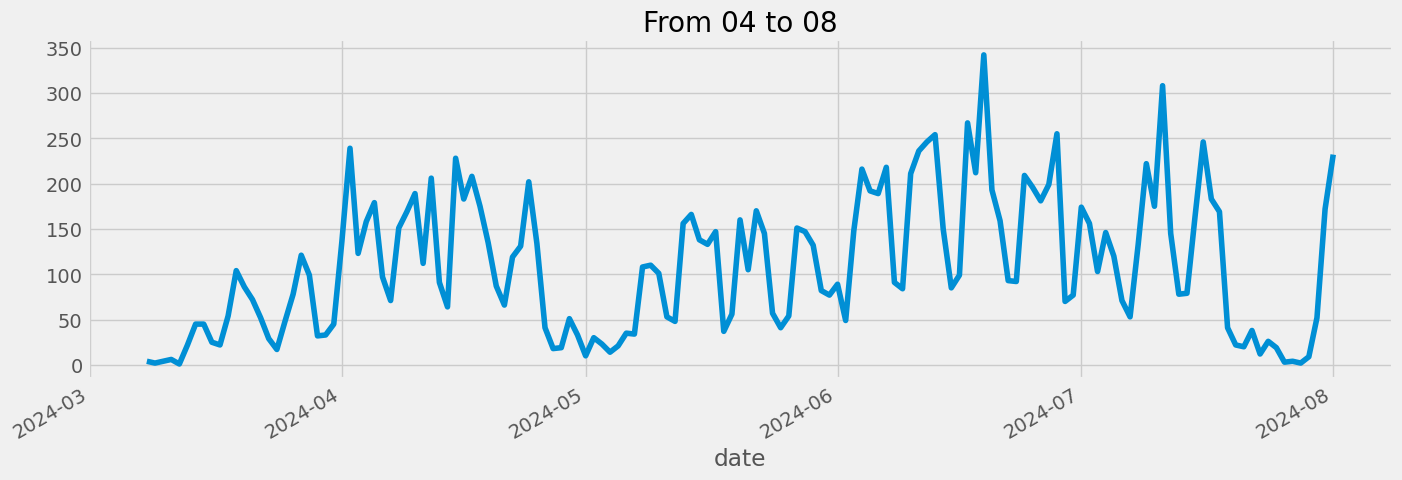

In [28]:
#Arbitrary time period

df_c_tc['quant'].loc[(df_c_tc.index > '2024-02-20') & (df_c_tc.index < '2024-08-02')] \
    .plot(figsize=(15, 5), title='From 04 to 08')
plt.show()

## Feature Creation and splitting the data

In [23]:
df_c_tc = df_c_tc.loc[(df_c_tc.index > '2024-02-20')]

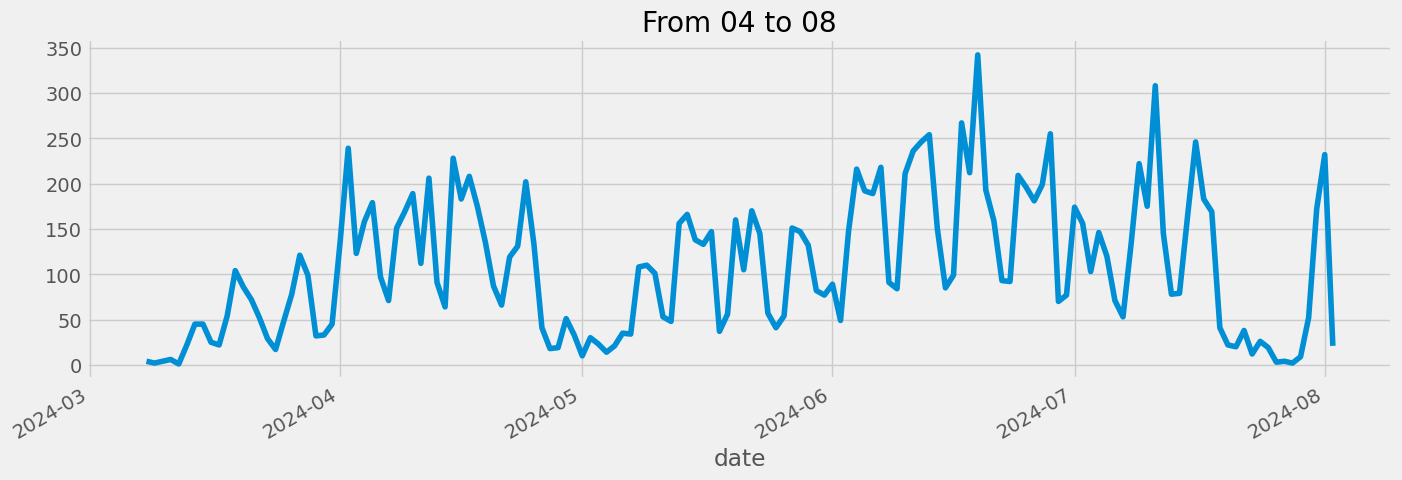

In [29]:
df_c_tc['quant'].plot(figsize=(15, 5), title='New Data')
plt.show()

In [71]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    """ df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], #300 is month 3 day 00 and so on
                          labels=['Spring', 'Summer', 'Fall', 'Winter'] #differentiates between seasons in the year
                   ) """
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekday',
           ]] # X are the regressors here representing different characteristics
    if label:
        y = df[label] # y is equal to the variable of interest in this model 
        return X, y
    return X

X, y = create_features(df_c_tc, label='quant')
features_and_target = pd.concat([X, y], axis=1) #joining both of these values together here


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


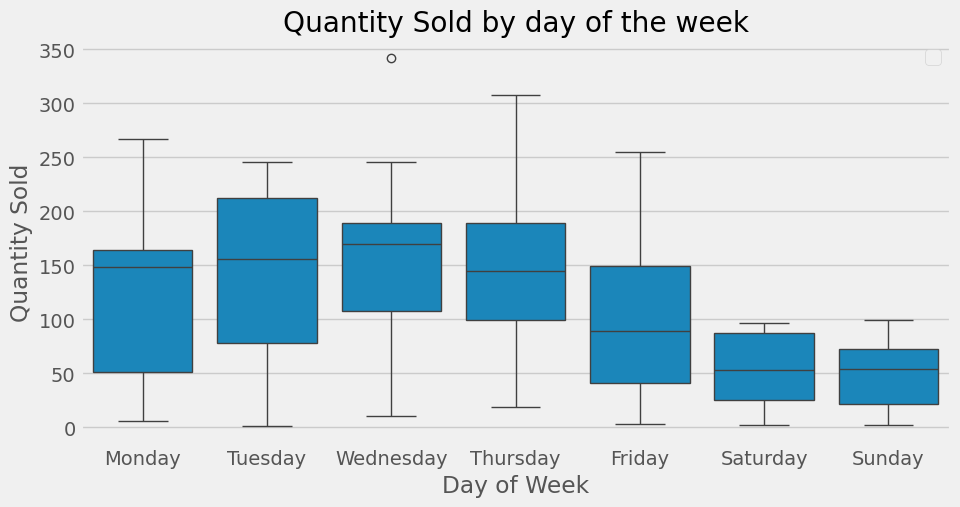

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='quant',
            ax=ax,
            linewidth=1)
ax.set_title('Quantity Sold by day of the week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Quantity Sold')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [74]:
df_c_tc

,SKU,quant
date,,
2024-03-08,TC213,4
2024-03-09,TC213,2
2024-03-11,TC213,6
2024-03-12,TC213,1
2024-03-13,TC213,22
...,...,...
2024-07-29,TC213,9
2024-07-30,TC213,52
2024-07-31,TC213,172


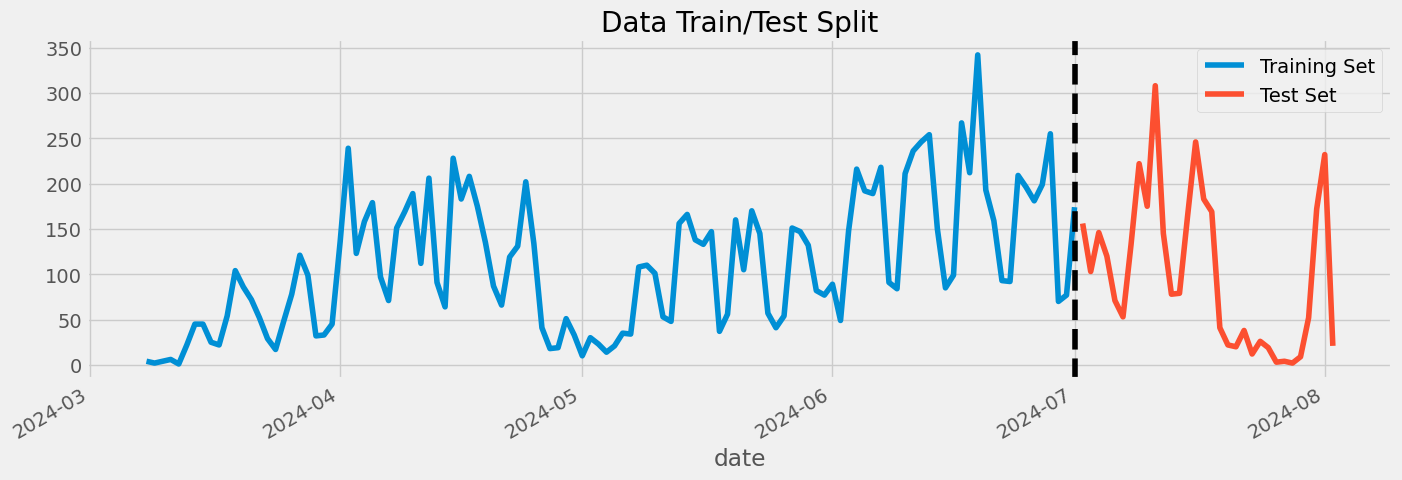

In [75]:
split_date = '2024-07-01'
df_train = df_c_tc.loc[df_c_tc.index <= split_date].copy()
df_test = df_c_tc.loc[df_c_tc.index > split_date].copy()

# Plot train and test so you can see where we have split
fig, ax = plt.subplots(figsize=(15, 5))
df_train['quant'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test['quant'].plot(ax=ax, label='Test Set')
ax.axvline('2024-07-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Simple Prophet Model

- Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
    - Datetime column named: ds
    - target : y

In [76]:
df_train_prophet = df_train.reset_index().rename(columns={'date':'ds','quant':'y'}) #renaming the columns

In [77]:
df_train_prophet

,ds,SKU,y
0,2024-03-08,TC213,4
1,2024-03-09,TC213,2
2,2024-03-11,TC213,6
3,2024-03-12,TC213,1
4,2024-03-13,TC213,22
...,...,...,...
110,2024-06-27,TC213,199
111,2024-06-28,TC213,255
112,2024-06-29,TC213,70
113,2024-06-30,TC213,77


In [78]:
%%time 
model = Prophet()
model.fit(df_train_prophet) #fitting/training the actual model 

18:15:57 - cmdstanpy - INFO - Chain [1] start processing
18:15:57 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 15.3 ms, sys: 11.7 ms, total: 26.9 ms
Wall time: 206 ms


In [79]:
df_test_prophet = df_test.reset_index() \
    .rename(columns={'date':'ds',
                     'quant':'y'})

df_test_fcst = model.predict(df_test_prophet) #running the forecasts on the test data 

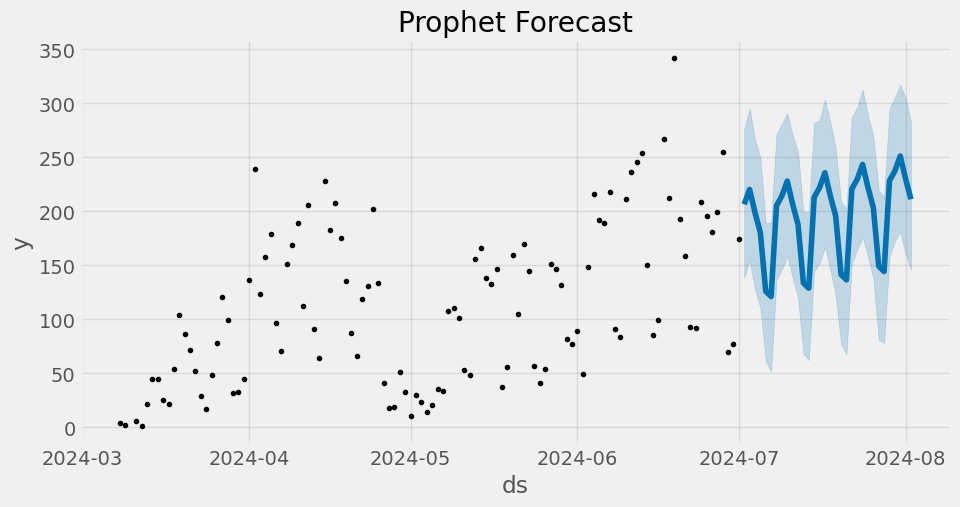

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(df_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

/Users/emtruzzi/miniconda3/envs/scient/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


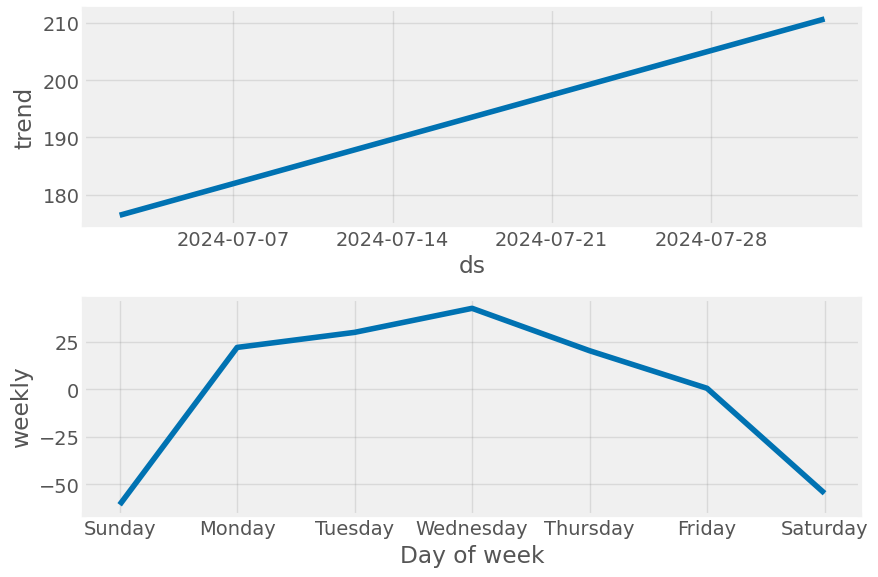

In [82]:
fig = model.plot_components(df_test_fcst)
plt.show()

### Comparing the forecast to actual values and evaluating with metrics

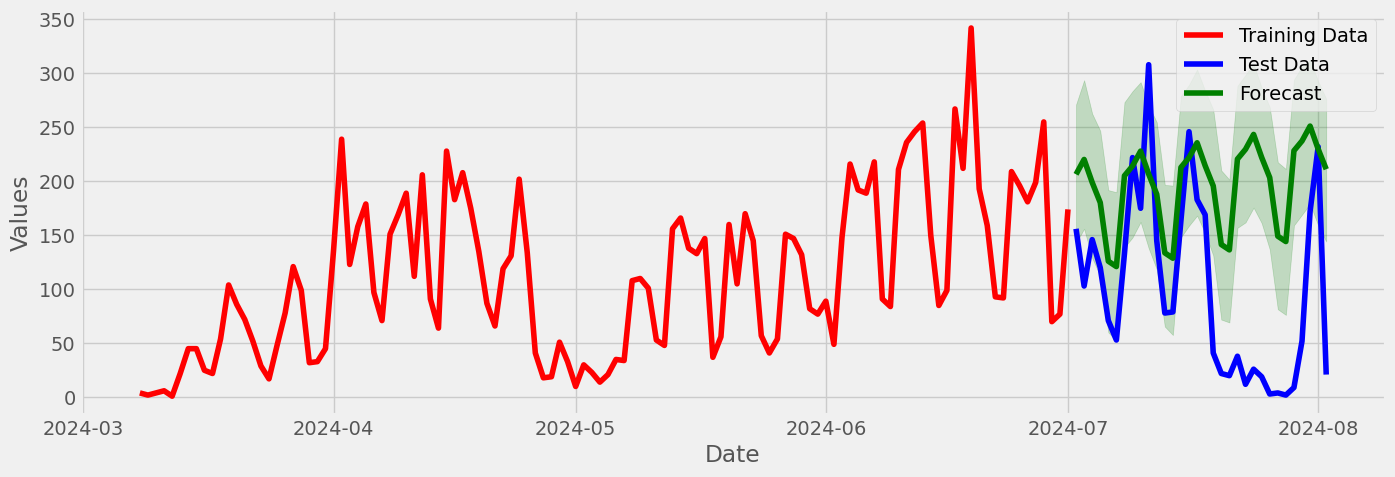

In [70]:
# Plot the training data as a red line
f, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train.index, df_train['quant'], color='r', label='Training Data')

# Plot the test data as a blue line
ax.plot(df_test.index, df_test['quant'], color='blue', label='Test Data')

# Plot the forecast as a green line
ax.plot(df_test_fcst['ds'], df_test_fcst['yhat'], color='green', label='Forecast')

# Optionally, add uncertainty intervals if they are available in the forecast data
if 'yhat_lower' in df_test_fcst.columns and 'yhat_upper' in df_test_fcst.columns:
    ax.fill_between(df_test_fcst['ds'], df_test_fcst['yhat_lower'], df_test_fcst['yhat_upper'], color='green', alpha=0.2)

# Add labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.legend()

plt.show()

In [53]:
np.sqrt(mean_squared_error(y_true=df_test['quant'],
                   y_pred=df_test_fcst['yhat']))

123.92360769730288

In [54]:
mean_absolute_error(y_true=df_test['quant'],
                   y_pred=df_test_fcst['yhat'])

104.1692003397538

In [55]:
mean_absolute_percentage_error(y_true=df_test['quant'],
                   y_pred=df_test_fcst['yhat'])

865.3006775211913

## Predicting into the future

In [61]:
future = model.make_future_dataframe(periods=365, freq='d', include_history=False)
forecast = model.predict(future)

In [62]:
forecast[['ds','yhat']].head() #predictions for days of the week 

,ds,yhat
0,2024-07-02,206.476003
1,2024-07-03,220.264380
2,2024-07-04,198.993702
3,2024-07-05,180.273667
4,2024-07-06,125.996814
